# Part I - Ford go bike tripdata
## by Ayorinde A. Asiru

## Introduction
> The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area of the ford gobike for the month of February 2018. The information in the dataset include:
Trip Duration (seconds)
Start Time and Date
End Time and Date
Start Station ID
Start Station Name
Start Station Latitude
Start Station Longitude
End Station ID
End Station Name
End Station Latitude
End Station Longitude
Bike ID
User Type 
Member Year of Birth
Member Gender
Bike Share for all Trip



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
bikedata = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
#checking for the number of rows and columns in the dataset
bikedata.shape

(183412, 16)

In [5]:
#checking for duplicates in the dataset
sum(bikedata.duplicated())

0

In [6]:
bikedata1 = bikedata.dropna()
bikedata1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


### What is the structure of your dataset?

> The dataset contain 183,412 rows and 16 columns of data

### What is/are the main feature(s) of interest in your dataset?

> duration of the ride in seconds

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> User type
> member gender
> member age group

In [7]:
bikedata1.member_birth_year = bikedata1.member_birth_year.astype(int)
bikedata1.start_station_id = bikedata1.start_station_id.astype(int)
bikedata1.end_station_id =bikedata1.end_station_id.astype(int)
bikedata1.head()

C:\Users\IFEOLUWA\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [8]:
bikedata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  int32  
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  int32  
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  int32  
 14  memb

##start time and end time should be datetime format, 
##member gender, user type, bike share trip should be categories  

In [9]:
bikedata1.start_time = pd.to_datetime(bikedata1.start_time)
bikedata1.end_time = pd.to_datetime(bikedata1.end_time)

C:\Users\IFEOLUWA\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
bikedata1.member_gender = bikedata1.member_gender.astype('category')
bikedata1.user_type = bikedata1.user_type.astype('category')
bikedata1.bike_share_for_all_trip = bikedata1.bike_share_for_all_trip.astype('category')

In [11]:
bikedata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

## Univariate Exploration

# What is the distribution of the birth year of the users

In [12]:
color = sb.color_palette()[0]

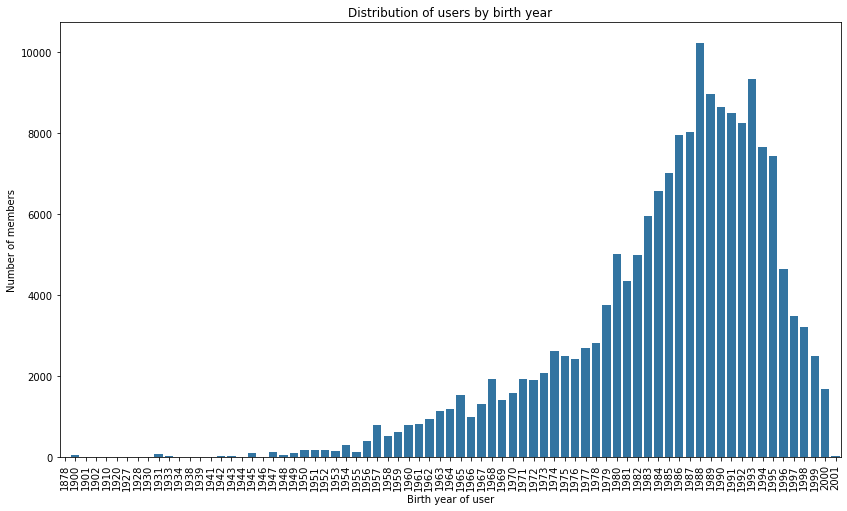

In [13]:
#plotting a bar chart for the age distribution  
plt.figure(figsize =[14,8])
sb.countplot(data = bikedata1, x ='member_birth_year', color = color)
plt.xticks(rotation = 90)
plt.xlabel('Birth year of user')
plt.ylabel('Number of members')
plt.title('Distribution of users by birth year');

### The highest numbers of customers in the dataset has a left skew with a gradual increase in number customers born each year increase up to the peak in 1988 and a gradual decline from there on with a spike in 1993. 

In [14]:
bikedata1.member_birth_year.describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

# What is the age range of users

In [15]:
#creating a new column for age
bikedata1['age'] = 2018 - bikedata1.member_birth_year
bikedata1.head()

C:\Users\IFEOLUWA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,34
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,46
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,29
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,44
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,59


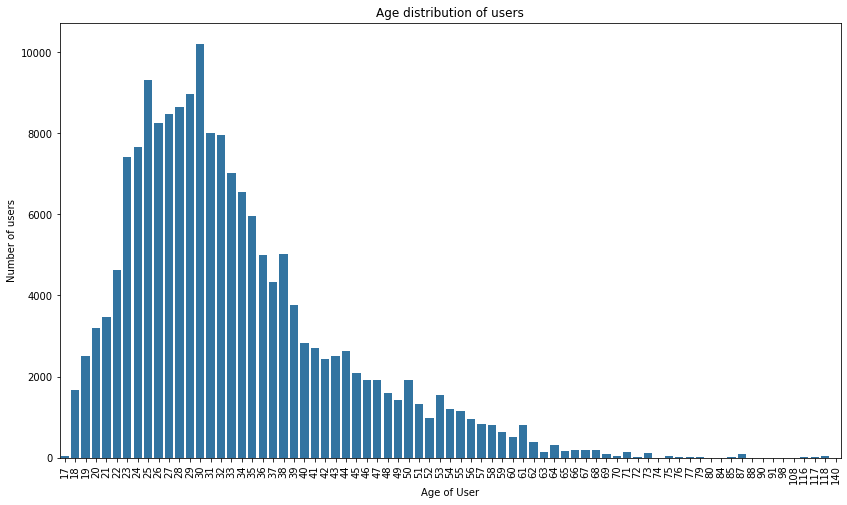

In [16]:
#plotting the age distribution
plt.figure(figsize =[14,8])
sb.countplot(data =bikedata1, x ='age', color = color)
plt.xlabel('Age of User')
plt.ylabel('Number of users')
plt.title("Age distribution of users")
plt.xticks(rotation = 90);


### The distribution of customers age in the dataset has a right skew with a modal value of 30 year and a gradual decline from there on.

# What is the distribution of duration of rides?

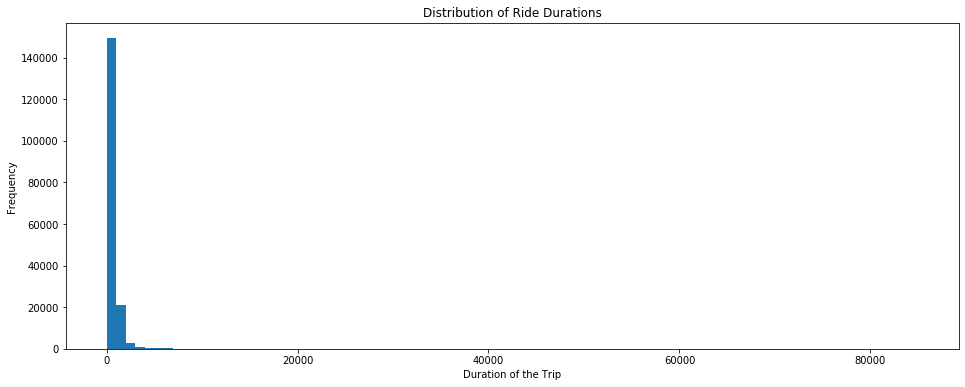

In [17]:
bins = np.arange(0, bikedata1.duration_sec.max()+500, 1000)
plt.figure(figsize =(16, 6))
plt.hist(data = bikedata1, x = 'duration_sec', bins = bins)
plt.xlabel('Duration of the Trip')
plt.ylabel('Frequency')
plt.title('Distribution of Ride Durations');

### The distribution is right skewed with most values less than 10000. A better way to explore this is to implement a log tranformation on the duration axis 

In [18]:
#getting a log transformation of the values within the duration column
np.log10(bikedata1.duration_sec.describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

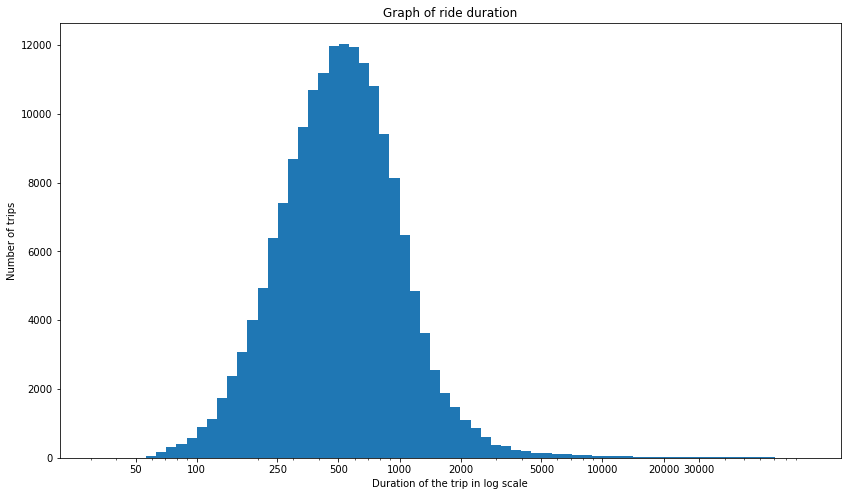

In [19]:
bins=10**(np.arange(1.5,5+0.05, 0.05))
ticks=[50, 100, 250, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 3e4]
labels=[50,100, 250, 500, 1000, 2000, 5000, 10000, 20000, 30000]
plt.figure(figsize =[14,8])
plt.hist(data = bikedata1, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xlabel('Duration of the trip in log scale')
plt.ylabel('Number of trips')
plt.xticks(ticks,labels)
plt.title('Graph of ride duration');

### The distribution of the duration of the trip is unimodal and right skewed with a peek around 600s. minimum trip duration is 61s while the maximum is above 80,000s. 

In [20]:
bikedata1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,34
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,46
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,29
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,44
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,59


# Does the day of the week influence the number of rides?

In [21]:
bikedata1['day'] = bikedata1.start_time.dt.day_name()

C:\Users\IFEOLUWA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
bikedata1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,34,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,46,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,29,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,44,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,59,Thursday


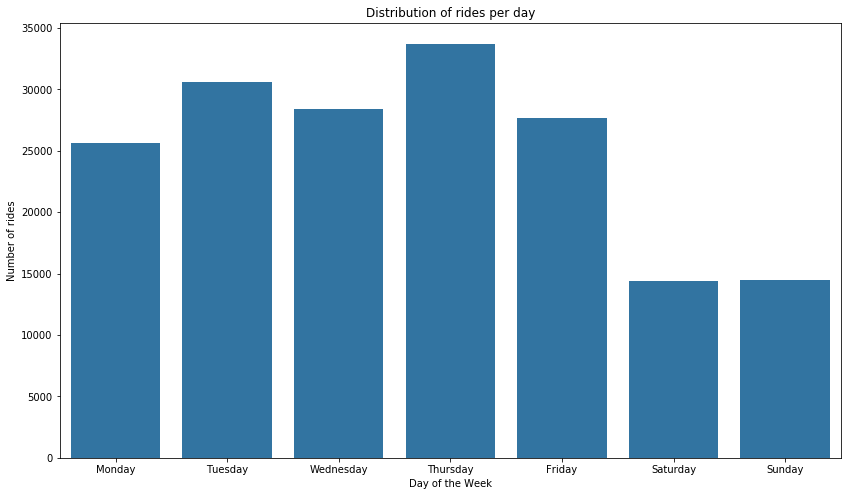

In [23]:
day_order =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize =[14,8])
sb.countplot(data = bikedata1, x= 'day', order =day_order, color = color)
plt.xlabel('Day of the Week')
plt.ylabel('Number of rides')
plt.title('Distribution of rides per day');

### The highest number of rides were recorded on Thurdays followed by Tuesday, Wednesday and Friday records almost equal number of trips the lowest number of trips were recorded on weekends day of Saturday and Sunday

# Is there a relationship between the hour of the day and the number of rides recorded?

In [24]:
#creating new columns for start hour and end hour 
bikedata1['starthour'] = bikedata1.start_time.dt.hour
bikedata1['endhour'] = bikedata1.start_time.dt.hour

C:\Users\IFEOLUWA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\IFEOLUWA\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


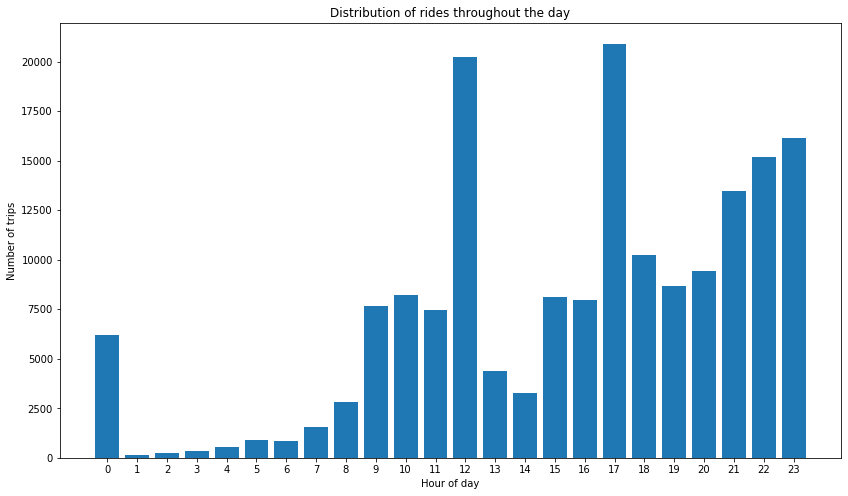

In [25]:
#bar chart of number of rides in each hour of the day
plt.figure(figsize =[14,8])
x = bikedata1.starthour.unique()
y = bikedata1.starthour.value_counts()
plt.bar(x, y)
plt.ylabel('Number of trips')
plt.xlabel('Hour of day')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.title('Distribution of rides throughout the day');

### The distribution of the number of rides by the starting hour is bimodal.
### The two peak period are 12:00 and 17:00 hours
### The rides with the lowest durations were recorded from 1am which gradually increases up to 10am

In [26]:
bikedata1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,day,starthour,endhour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,34,Thursday,17,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,46,Thursday,12,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,29,Thursday,17,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,44,Thursday,23,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,59,Thursday,23,23


# What are the five most frequently start station?

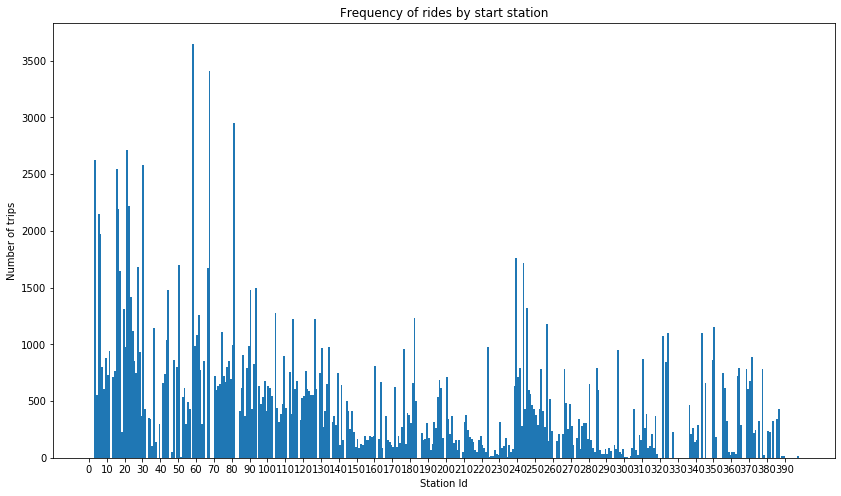

In [27]:
#checking the distribution of the trips by start stations 
plt.figure(figsize =[14,8])
bins = np.arange(0, bikedata1.start_station_id.max()+1, 1)
plt.hist(data = bikedata1, x ='start_station_id', bins=bins)
label = np.arange(0, bikedata1.start_station_id.max()+1, 10)
plt.xticks(label)
plt.xlabel('Station Id')
plt.ylabel('Number of trips')
plt.title('Frequency of rides by start station');

### The five most frequently used start stations are stations 58 with 3,647 trips, station 67 with 3408 trips, station 81 with 2952 trips, station 21 with 2711 trips and station 3 with 2620 trips

# What are the five most frequently end station?

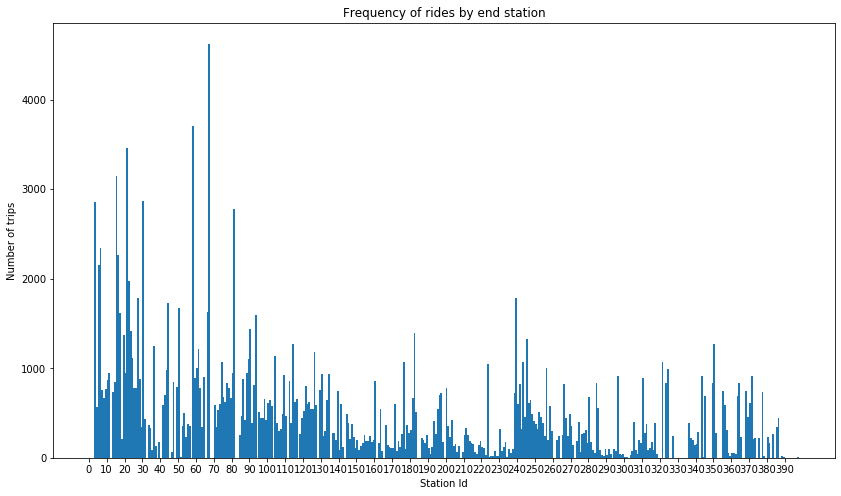

In [28]:
#plotting of the distribution of the end stations
plt.figure(figsize =[14,8])
bins = np.arange(0, bikedata1.end_station_id.max()+1, 1)
plt.hist(data = bikedata1, x ='end_station_id', bins=bins)
label = np.arange(0, bikedata1.end_station_id.max()+1, 10)
plt.xticks(label)
plt.xlabel('Station Id')
plt.ylabel('Number of trips')
plt.title('Frequency of rides by end station');

### The five most frequently used end stations are stations 67 with 4,624 trips, station 58 with 3,709 trips, station 21 with 3,461 trips, station 15 with 3151 trips and station 30 with 2870 trips
### Stations 58, 67 and 21 are of considerable importance since they are both frequently used start and stop locations

# What is the composition of the company's users?

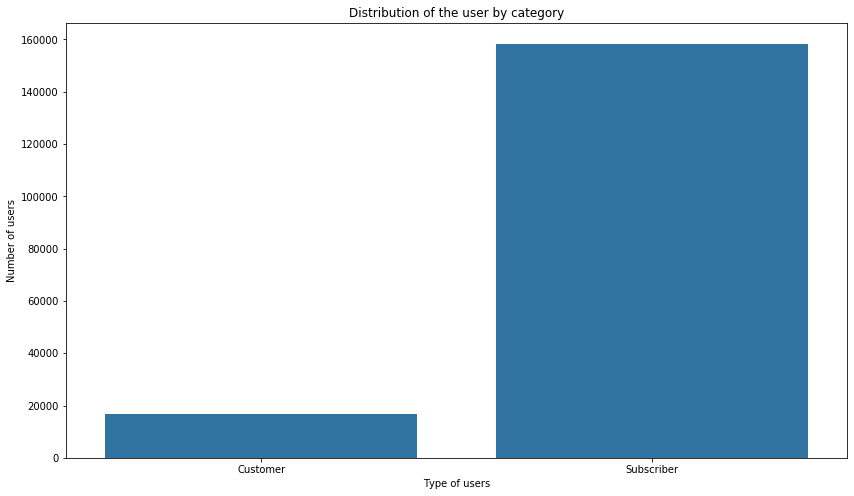

In [29]:
plt.figure(figsize =[14,8])
sb.countplot(data = bikedata1, x ='user_type', color =color)
plt.xlabel('Type of users')
plt.ylabel('Number of users')
plt.title('Distribution of the user by category');

### The Subscribers number about 160,000 while customers are around 20,000
### Subscriber to customer ratio is about 8:1

# What is the composition of the company's users by gender?

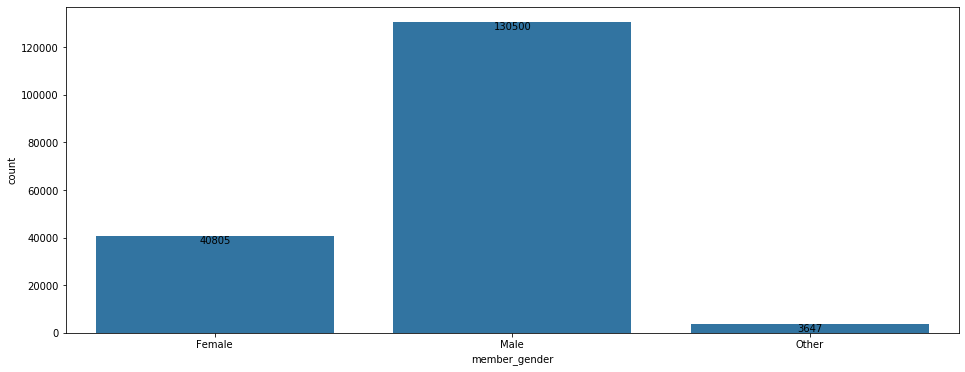

In [30]:
plt.figure(figsize =(16,6))
member_gender = bikedata1.member_gender.value_counts()
sb.countplot(data = bikedata1, x ='member_gender', color = color)
for i in range (member_gender.shape[0]):
    count = member_gender[i]
    plt.text(i, count+300, count, ha = 'center', va='top')


### Male users outnumber female users and the 'other' users 

## Bivariate Exploration

# What is the distribution of company users by type and age?

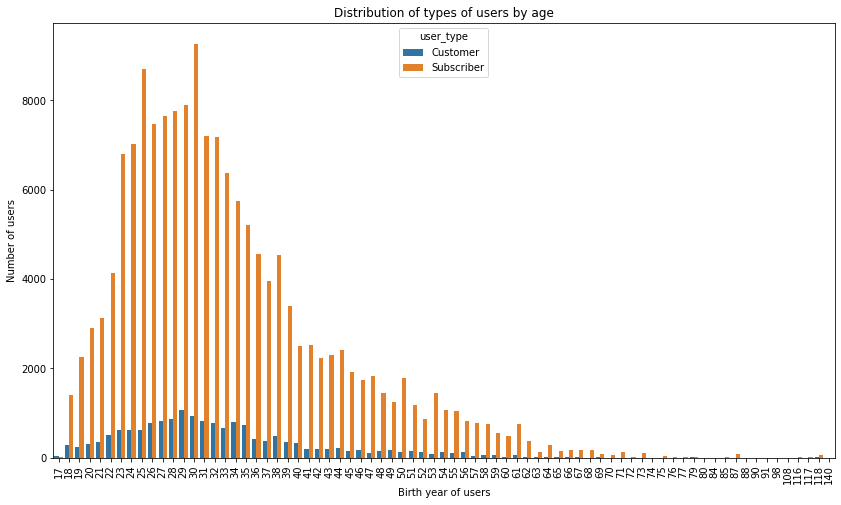

In [31]:
plt.figure(figsize =[14, 8])
sb.countplot(data = bikedata1, x= 'age', hue = 'user_type')
plt.xticks(rotation = 90)
plt.ylabel('Number of users')
plt.xlabel('Birth year of users')
plt.title('Distribution of types of users by age');

### The distribution of both customers and users follow similar trend with the largest range accounted for by the age group 23 - 32
### The modal age for subscribers is 30 while the modal age for customers is 29

In [32]:
bikedata1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,day,starthour,endhour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,34,Thursday,17,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,46,Thursday,12,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,29,Thursday,17,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,44,Thursday,23,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,59,Thursday,23,23


# What is the mean duration of trips starting each hour?

In [33]:
def setticks():
    ticks = np.arange(600,2000+200,200)
    label = [600,800,'1k','1.2k','1.4k','1.6k','1.8k','2k']
    x = plt.xticks(np.arange(0,24,1));
    y = plt.yticks(ticks,label)
    return x, y

In [34]:
def titles():
    x = plt.title('Trips Start hour having Avg. trip duration')
    y = plt.xlabel('Hour of the Day')
    z = plt.ylabel('Avg. Trip duration (sec)')

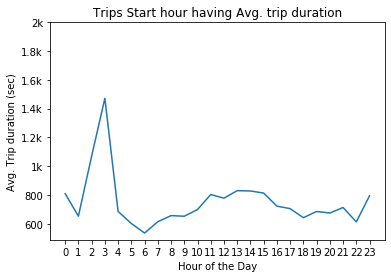

In [35]:
# Group by hour and calculate mean durations in seconds
start_hour_duration = bikedata1.groupby('starthour').mean().duration_sec.reset_index()

#  the trend of start hour and duration
sb.lineplot(data=start_hour_duration, x='starthour', y='duration_sec')

# set ticks
setticks();

# title and labels
titles();


### The mean trip duration is highest for trips started around 3am

# What is the mean duration of trips ending each hour?

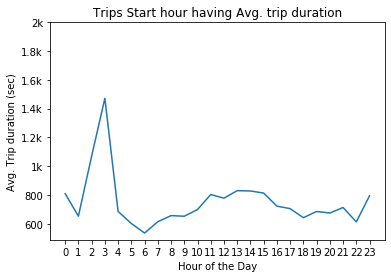

In [36]:
end_hour_duration = bikedata1.groupby('endhour').mean().duration_sec.reset_index()
sb.lineplot(data=end_hour_duration, x='endhour', y='duration_sec')
# set ticks
setticks();

# title and labels
titles();

### The mean trip duration is highest for trips ended around 3am

# What is the relationship between Age and duration of rides

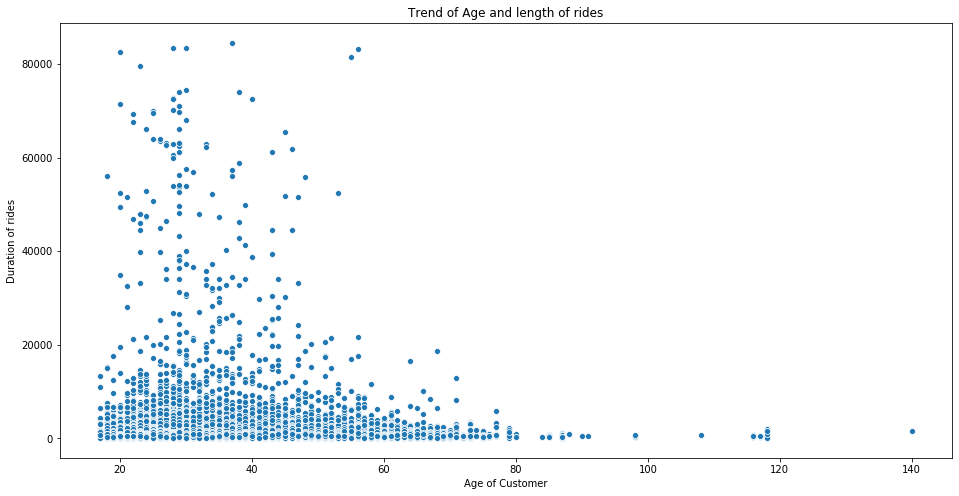

In [37]:
plt.figure(figsize =(16,8))
sb.scatterplot(data=bikedata1, x='age', y='duration_sec')
plt.xlabel('Age of Customer')
plt.ylabel('Duration of rides')
plt.title('Trend of Age and length of rides');


### Younger users between age 20 and 60 tend to take longer trip than older users

## Multivariate Exploration

# Does Gender and Age influence the duration of trips 

In [38]:
def label():
    x = plt.xlabel('Age of Customer')
    y = plt.ylabel('Duration of rides')
    return x,y

In [39]:
def label1():
    label = [0,10,20,30,40,50,60,70,80,90, 100, 110, 120,130,140]
    ticks = np.arange(0, bikedata1['age'].max()+10, 10)
    x = plt.xlabel('Age of Customer')
    y = plt.ylabel('Duration of rides')
    z = g.set_titles('{col_name}')
    a = g.set_axis_labels('Age of User', 'Duration of the trip')
    return plt.xticks(ticks, label), g.fig.set_size_inches(14, 8), x, y,z,a


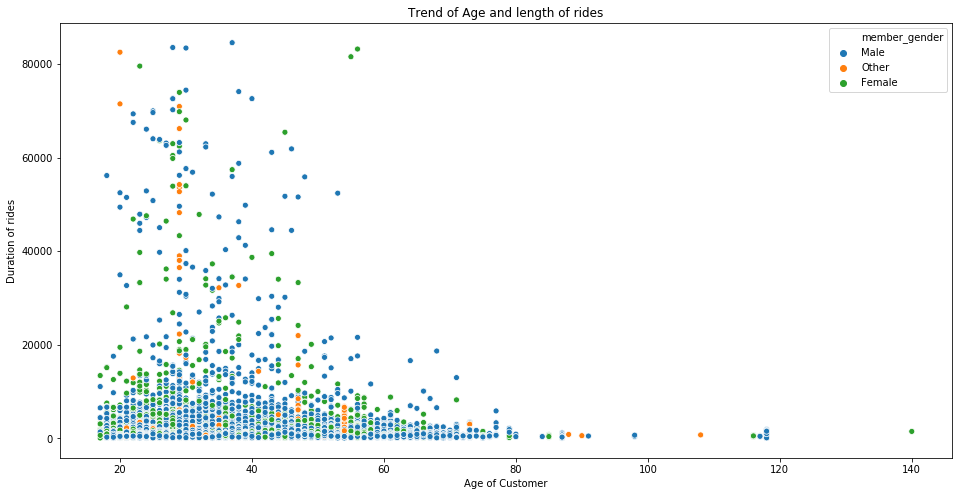

In [40]:
plt.figure(figsize =(16,8))
sb.scatterplot(data=bikedata1, x='age', y='duration_sec', hue ='member_gender')
plt.title('Trend of Age and length of rides')
label();


### Male user between the age 20 and 55 tend to take longer trips the other two genders

In [41]:
bikedata1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,day,starthour,endhour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,34,Thursday,17,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,46,Thursday,12,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,29,Thursday,17,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,44,Thursday,23,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,59,Thursday,23,23


# What is the distribution of trip duration and gender with start hour?

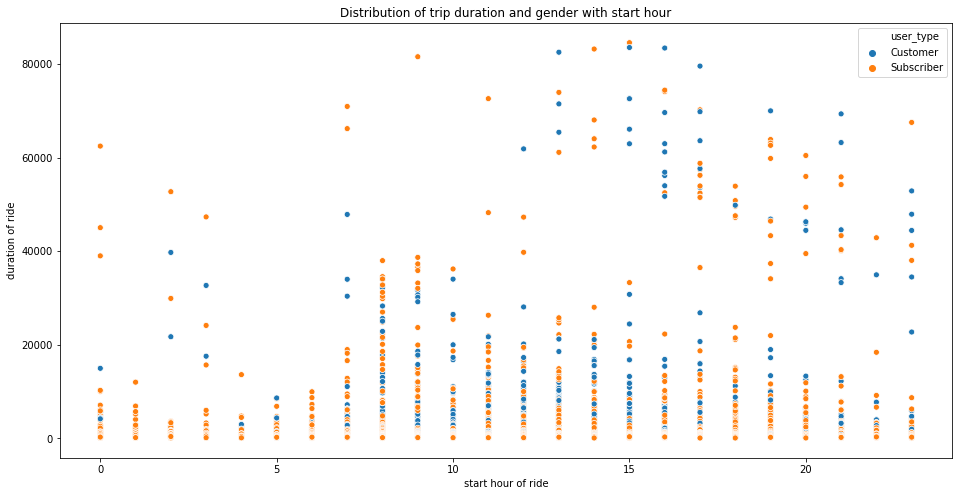

In [42]:
plt.figure(figsize =(16,8))
sb.scatterplot(data = bikedata1, x='starthour', y ='duration_sec', hue ='user_type')
plt.title('Distribution of trip duration and gender with start hour')
plt.xlabel('start hour of ride')
plt.ylabel('duration of ride');

# Is there a difference in the duration of rides by user group and age group?

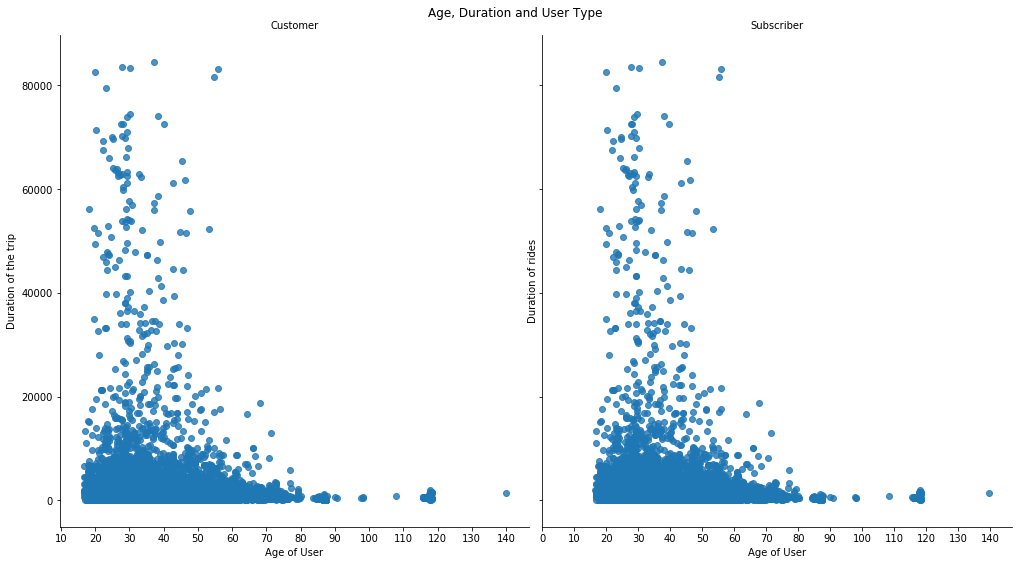

In [43]:
g = sb.FacetGrid(data = bikedata1, col ='user_type', height = 5, aspect = 1.5)
g.map(sb.regplot, data=bikedata1, x='age', y='duration_sec', fit_reg=False, x_jitter = 0.4)
label1()
plt.suptitle('Age, Duration and User Type ');

### The trend of duration of trip with age of the user does not significant differ across customer and subscribers however, duration of trips decreases with increasing age in both groups 

# Is there a variation in the duration of rides with age of users and gender?

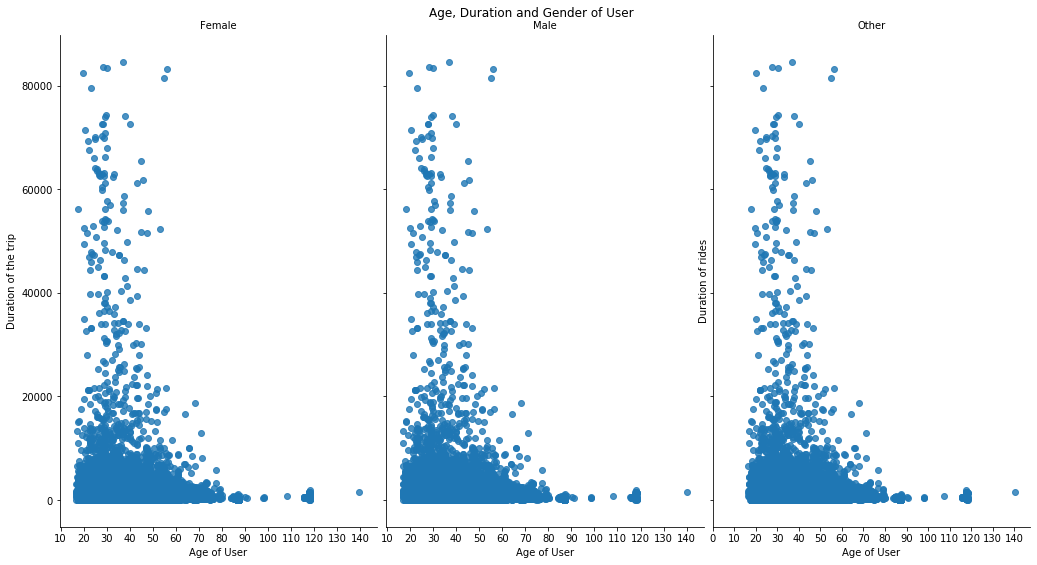

In [44]:
g = sb.FacetGrid(data = bikedata1, col ='member_gender', height = 5, aspect = 1.5)
g.map(sb.regplot, data=bikedata1, x='age', y='duration_sec', fit_reg=False, x_jitter = 0.4)
label1()
plt.suptitle('Age, Duration and Gender of User ');

### The trend of duration of trip with age of the user does not significant differ across gender. However, duration of trips decreases with increasing age across the genders.

# Is there a variation in the duration of rides with ride sharing and age of users

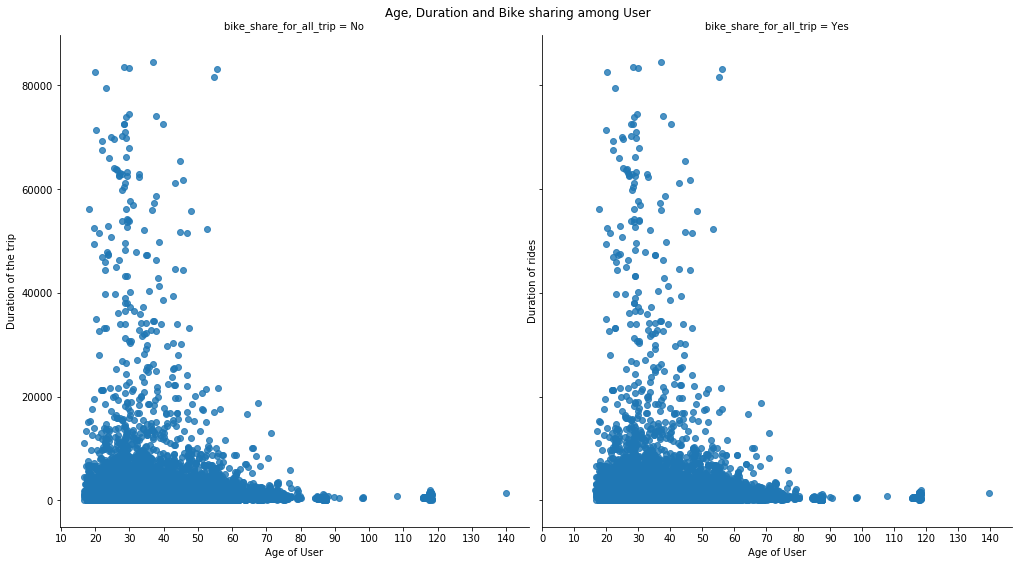

In [45]:
g = sb.FacetGrid(data = bikedata1, col ='bike_share_for_all_trip', height = 5, aspect = 1.5, margin_titles = True)
g.map(sb.regplot, data=bikedata1, x='age', y='duration_sec', fit_reg=False, x_jitter = 0.4)
label1()
plt.suptitle('Age, Duration and Bike sharing among User');

### The trend of duration of trip does not significant differ across sharing of trips. However, duration of trips decreases with increasing age in both groups. And younger riders are more likely to share bikes than older riders. 

# Is there a variation in the duration of rides with ride sharing, gender and age of users?

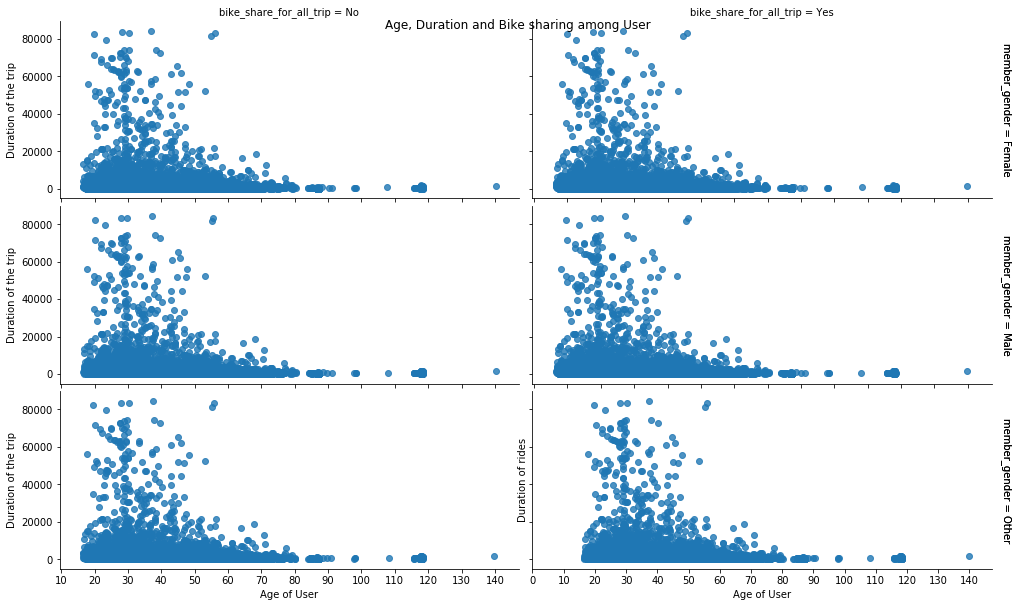

In [46]:
g = sb.FacetGrid(data = bikedata1, col ='bike_share_for_all_trip', row = 'member_gender', height = 5, aspect = 1.5,margin_titles =True)
g.map(sb.regplot, data=bikedata1, x='age', y='duration_sec', fit_reg=False, x_jitter = 0.4)
label1()
plt.suptitle('Age, Duration and Bike sharing among User');

## Regardless of the combination of age, gender and ride sharing, the duration of rides follow similar trends 

In [47]:
bikedata1.to_csv('201902-fordgobike-tripdataclean.csv',index=False)

## Conclusions
### From the dataset, the following conclusions can be reached
#### A larger percentage of Ford go bikes are accounted for by users between age 18 and 40
#### Although longer trips do take place, the average trip duration is only around 600s (10mins).
#### The highest number of rides were recorded on Thurdays followed by Tuesday, Wednesday and Friday records almost equal number of trips the lowest number of trips were recorded on weekends day of Saturday and Sunday
#### Stations 58, 67 and 21 are of considerable importance since they are both frequently used start and stop locations
#### Male user between the age 20 and 55 tend to take longer trips the other two genders
#### Subscriber to customer ratio is about 8:1
#### The distribution of the number of rides by the starting hour is bimodal.
#### The two peak period are 12:00 and 17:00 hours